# **Kidney Disease Prediction Model**



[Click here for the Kaggle Dataset](https://www.kaggle.com/datasets/mansoordaku/ckdisease)

## Dataset Overview

#### Variable Information
The dataset consists of 25 variables, including 11 numeric and 14 nominal variables. Here are some key variables:

1. Age (Numerical): Age in years
2. Blood Pressure (Numerical): Blood pressure in mm/Hg
3. Specific Gravity (Nominal): Specific gravity (1.005, 1.010, 1.015, 1.020, 1.025)
4. Albumin (Nominal): Albumin levels (0, 1, 2, 3, 4, 5) [5 being the highest and 1 being the lowest]
5. Sugar (Nominal): Sugar levels (0, 1, 2, 3, 4, 5) [5 being the highest and 1 being the lowest]
6. Red Blood Cells (Nominal): Presence of red blood cells (normal, abnormal)
7. Pus Cell (Nominal): Presence of pus cells (normal, abnormal)
8. Pus Cell Clumps (Nominal): Presence of pus cell clumps (present, not present)
9. Bacteria (Nominal): Presence of bacteria (present, not present)
10. Blood Glucose Random (Numerical): Blood glucose random levels in mgs/dl
11. Blood Urea (Numerical): Blood urea levels in mgs/dl
12. Serum Creatinine (Numerical): Serum creatinine levels in mgs/dl
13. Sodium (Numerical): Sodium levels in mEq/L
14. Potassium (Numerical): Potassium levels in mEq/L
15. Haemoglobin (Numerical): Haemoglobin levels in gms
16. Packed Cell Volume (Numerical)
17. White Blood Cell Count (Numerical): White blood cell count in cells/cumm
18. Red Blood Cell Count (Numerical): Red blood cell count in millions/cmm
19. Hypertension (Nominal): Hypertension status (yes, no)
20. Diabetes Mellitus (Nominal): Diabetes mellitus status (yes, no)
21. Coronary Artery Disease (Nominal): Coronary artery disease status (yes, no)
22. Appetite (Nominal): Appetite status (good, poor)
23. Pedal Edema (Nominal): Presence of pedal edema (yes, no)
24. Anaemia (Nominal): Presence of anaemia (yes, no)
25. Class (Nominal): Classification (ckd, notckd)

## Step 1: Import the necessary libraries

In [53]:
import warnings
warnings.filterwarnings("ignore")

#for data manipulation
import pandas as pd
import numpy as np

#for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#for data modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
#import xgboost as xgb
import pickle

#for model evaluation
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

## Step 2: Load the dataset

In [54]:
df = pd.read_csv(r'/workspaces/Kidney-Disease-Prediction-Model/Data/data.csv')

## Step 3: Introductory Insights

Obtain introductory information such as shape of the data, number of rows, number of columns, etc.

In [55]:
df.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [56]:
df.tail(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53.0,6800.0,6.1,no,no,no,good,no,no,notckd


In [57]:
print('Information about the columns and its datatypes')
df.info()

print('\nShape of the data')
print(df.shape)
row, col = df.shape

print('Number of Rows :', row)
print('Number of Columns :', col)

Information about the columns and its datatypes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    

## Step 4: Statistical Insights

Obtain the mean, standard deviation, etc. from the data

In [58]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [59]:
df['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

Here, **ckd** represents a person who has chronic kidney disease and **notckd** represents a person who does not have chronic kidney disease.

## Step 5: Data Cleaning

Handling duplicates and missing values

### Renaming the Columns

This is to make the column names more user-friendly.

In [60]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin_lvl', 'sugar_lvl', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random_lvl', 'blood_urea_lvl', 'serum_creatinine_lvl', 'sodium_lvl',
              'potassium_lvl', 'haemoglobin_lvl', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'anaemia', 'target']

### Missing Values

In [61]:
df.isnull().sum()

age                           9
blood_pressure               12
specific_gravity             47
albumin_lvl                  46
sugar_lvl                    49
red_blood_cells             152
pus_cell                     65
pus_cell_clumps               4
bacteria                      4
blood_glucose_random_lvl     44
blood_urea_lvl               19
serum_creatinine_lvl         17
sodium_lvl                   87
potassium_lvl                88
haemoglobin_lvl              52
packed_cell_volume           71
white_blood_cell_count      106
red_blood_cell_count        131
hypertension                  2
diabetes_mellitus             2
coronary_artery_disease       2
appetite                      1
peda_edema                    1
anaemia                       1
target                        0
dtype: int64

We have to remove the missing values. First we must split the columns into **numerical columns** and **categorical columns**.

#### Extracting Numerical and Categorical columns

In [62]:
category_cols = [col for col in df.columns if df[col].dtype == 'object']
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']

#### Handling Missing Values

**Numerical Columns**

We will be filling these columns using median.

In [63]:
def impute_median(feature):
    median_value = df[feature].median()
    df[feature] = df[feature].fillna(median_value)

In [64]:
for col in numeric_cols:
    impute_median(col)

In [65]:
df[numeric_cols].isnull().sum()

age                         0
blood_pressure              0
specific_gravity            0
albumin_lvl                 0
sugar_lvl                   0
blood_glucose_random_lvl    0
blood_urea_lvl              0
serum_creatinine_lvl        0
sodium_lvl                  0
potassium_lvl               0
haemoglobin_lvl             0
packed_cell_volume          0
white_blood_cell_count      0
red_blood_cell_count        0
dtype: int64

**Categorical Columns**

We will be filling these columns using mode.

In [66]:
def impute_mode(feature):
    mode_value = df[feature].mode().iloc[0]
    df[feature] = df[feature].fillna(mode_value)

In [67]:
for col in category_cols:
    impute_mode(col)

In [68]:
df[category_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
anaemia                    0
target                     0
dtype: int64

### Duplicate Values

In [69]:
df.duplicated().sum()

0

### Outliers
Some outliers represent natural variations in the population, and they should be left as is in your dataset. These are called true outliers. Other outliers are problematic and should be removed because they represent measurement errors, data entry or processing errors, or poor sampling.

#### Age

<Axes: xlabel='age'>

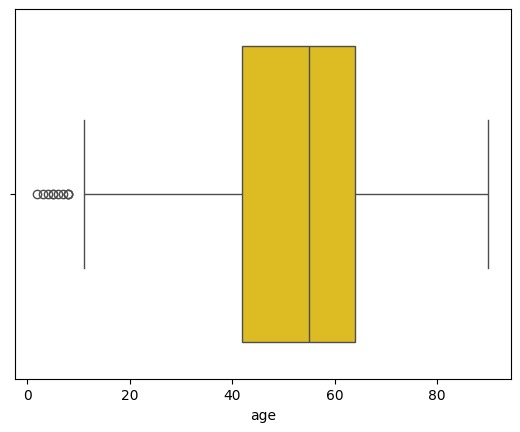

In [70]:
sns.boxplot(x = 'age', data=df, color='#fbcf04')

#### Blood Pressure

<Axes: xlabel='blood_pressure'>

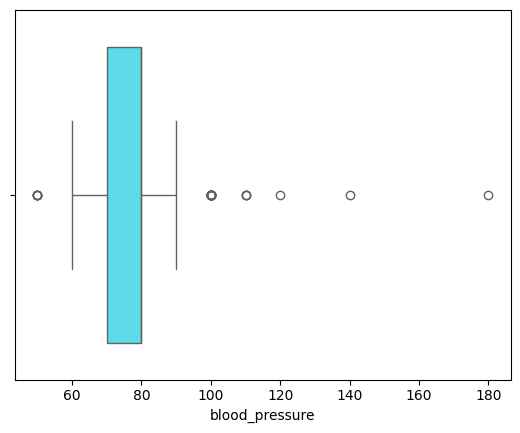

In [71]:
sns.boxplot(x = 'blood_pressure', data=df, color='#47EEFF')

The outliers above are problematic. To have a Blood Pressure of below 60 and above 170 is practically impossible, hence we will be removing them.

In [72]:
df = df[df['blood_pressure']>50]
df = df[df['blood_pressure']<170]

In [73]:
df.shape

(394, 25)

#### Specific Gravity

<Axes: xlabel='specific_gravity'>

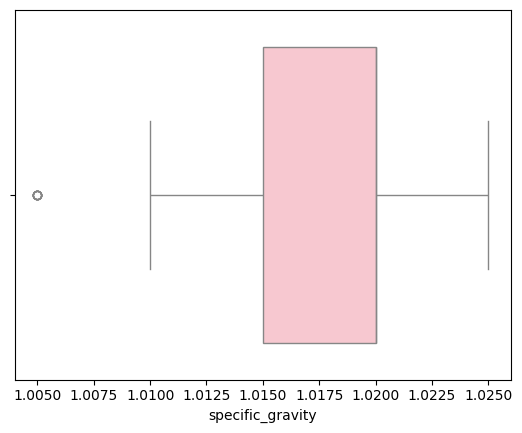

In [74]:
sns.boxplot(x = 'specific_gravity', data=df, color='pink')

#### Blood Glucose Random Levels

<Axes: xlabel='blood_glucose_random_lvl'>

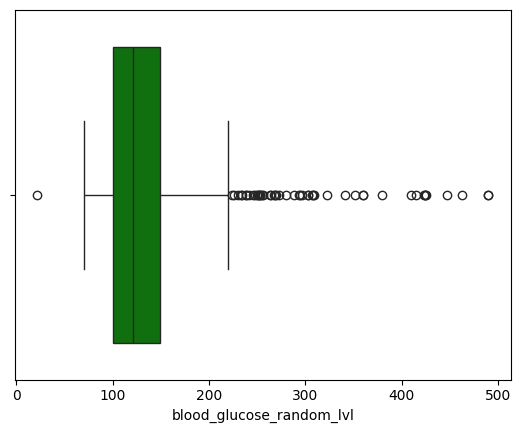

In [75]:
sns.boxplot(x = 'blood_glucose_random_lvl', data=df, color='Green')

#### Blood Urea Levels

<Axes: xlabel='blood_urea_lvl'>

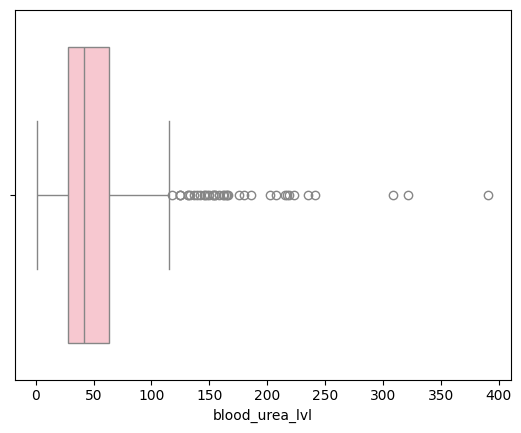

In [76]:
sns.boxplot(x = 'blood_urea_lvl', data=df, color='Pink')

#### Serum Creatinine Levels

<Axes: xlabel='serum_creatinine_lvl'>

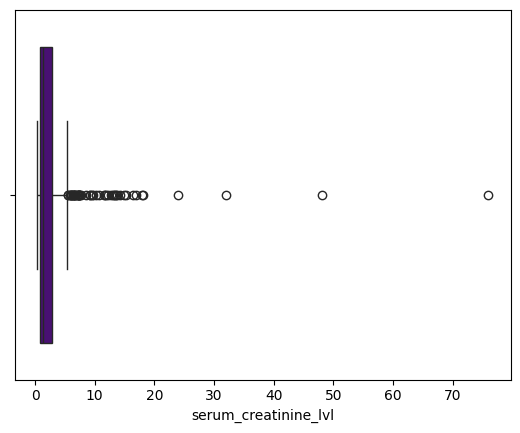

In [77]:
sns.boxplot(x = 'serum_creatinine_lvl', data=df, color='Indigo')

#### Sodium Levels

<Axes: xlabel='sodium_lvl'>

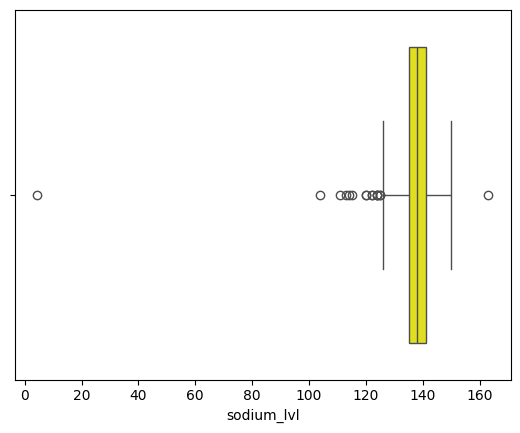

In [78]:
sns.boxplot(x = 'sodium_lvl', data=df, color='Yellow')

#### Potassium Levels

<Axes: xlabel='potassium_lvl'>

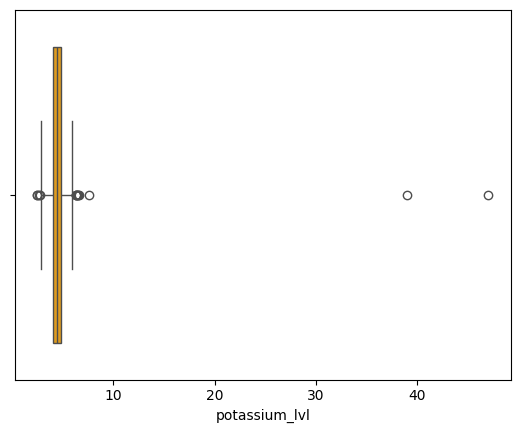

In [79]:
sns.boxplot(x = 'potassium_lvl', data=df, color='Orange')

#### Haemoglobin Levels

<Axes: xlabel='haemoglobin_lvl'>

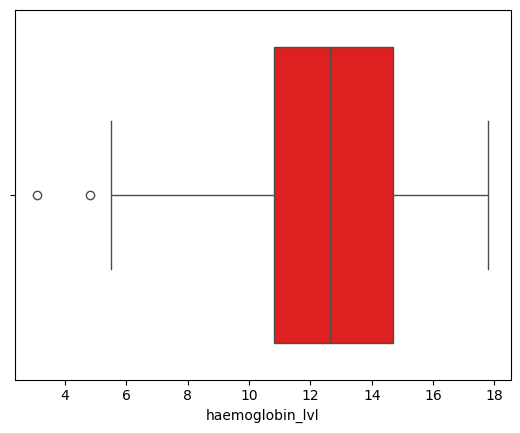

In [80]:
sns.boxplot(x = 'haemoglobin_lvl', data=df, color='Red')

#### Packed Cell Volume

<Axes: xlabel='packed_cell_volume'>

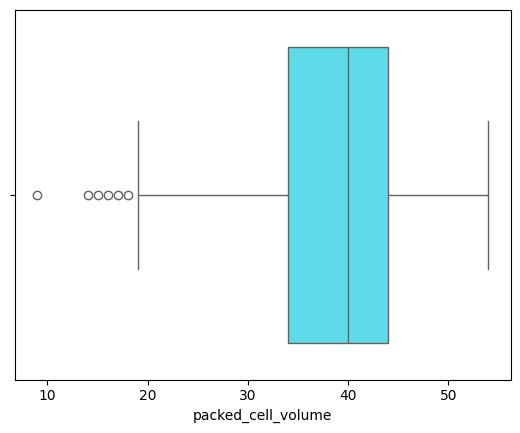

In [81]:
sns.boxplot(x = 'packed_cell_volume', data=df, color='#47EEFF')

#### White Blood Cell Count

<Axes: xlabel='white_blood_cell_count'>

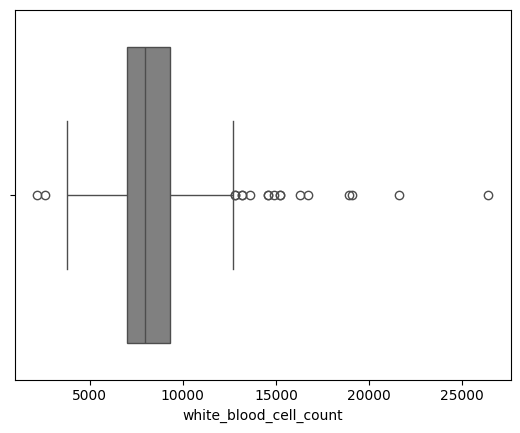

In [82]:
sns.boxplot(x = 'white_blood_cell_count', data=df, color='Grey')

#### Red Blood Cell Count

<Axes: xlabel='red_blood_cell_count'>

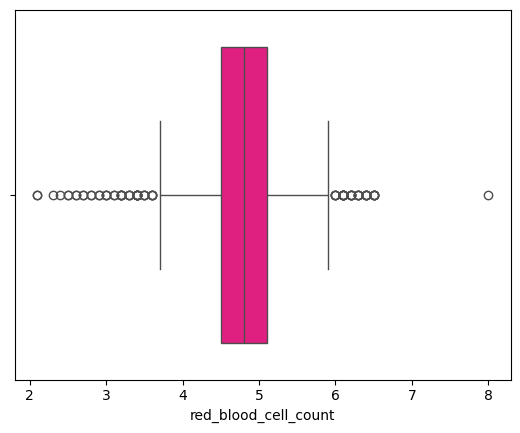

In [83]:
sns.boxplot(x = 'red_blood_cell_count', data=df, color='#ff0080')

## Step 6: Data Visualisation

### Correlation

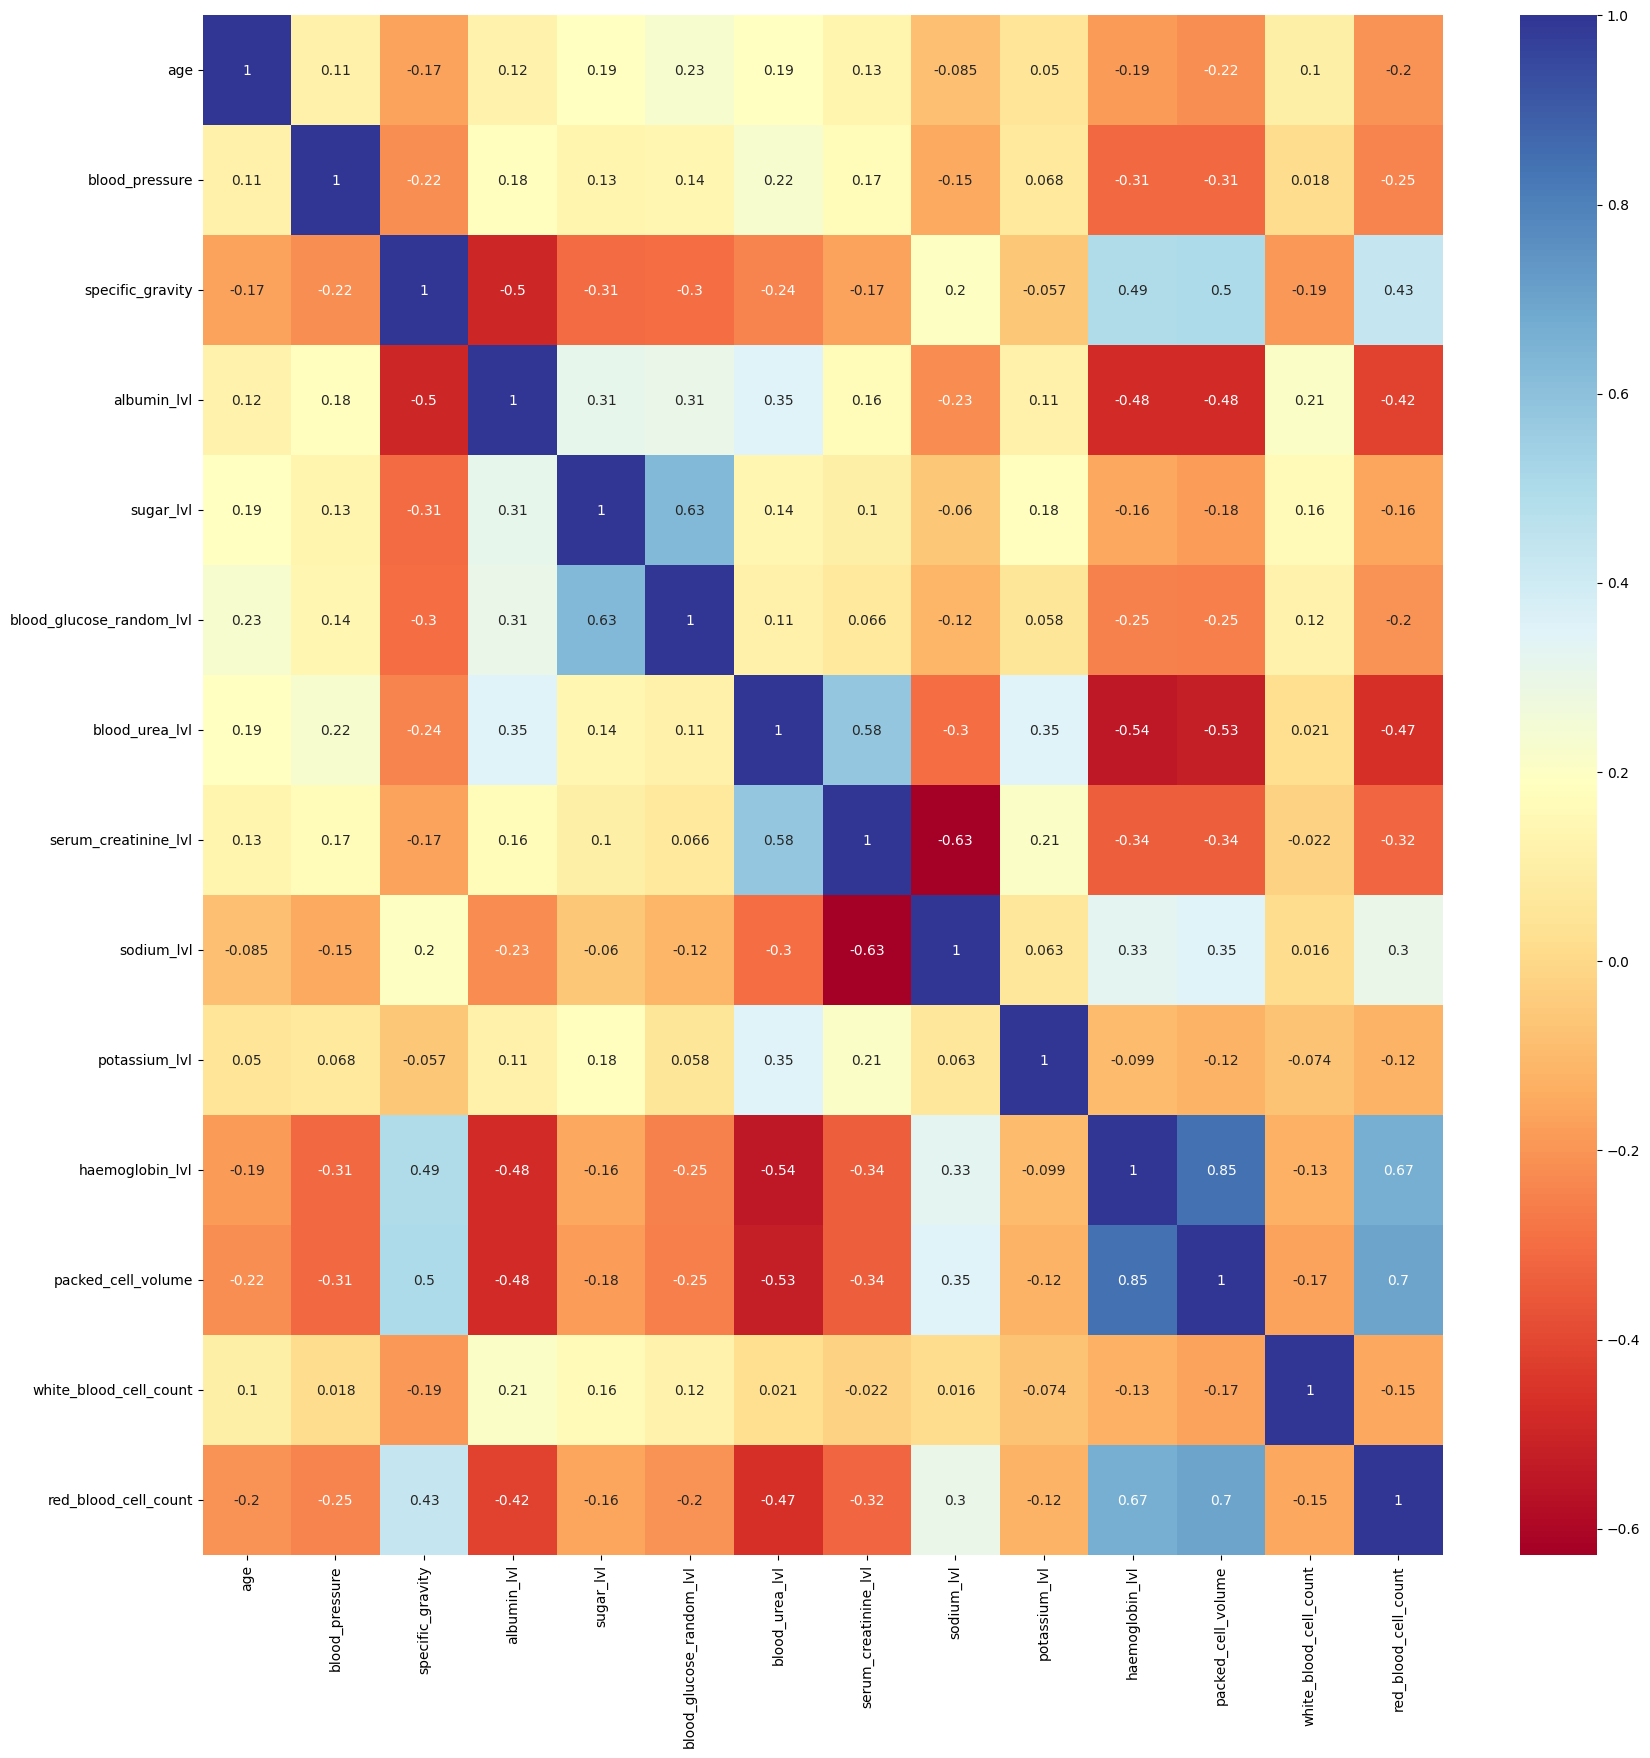

In [84]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlBu")

### Distribution Plot of Numerical Columns

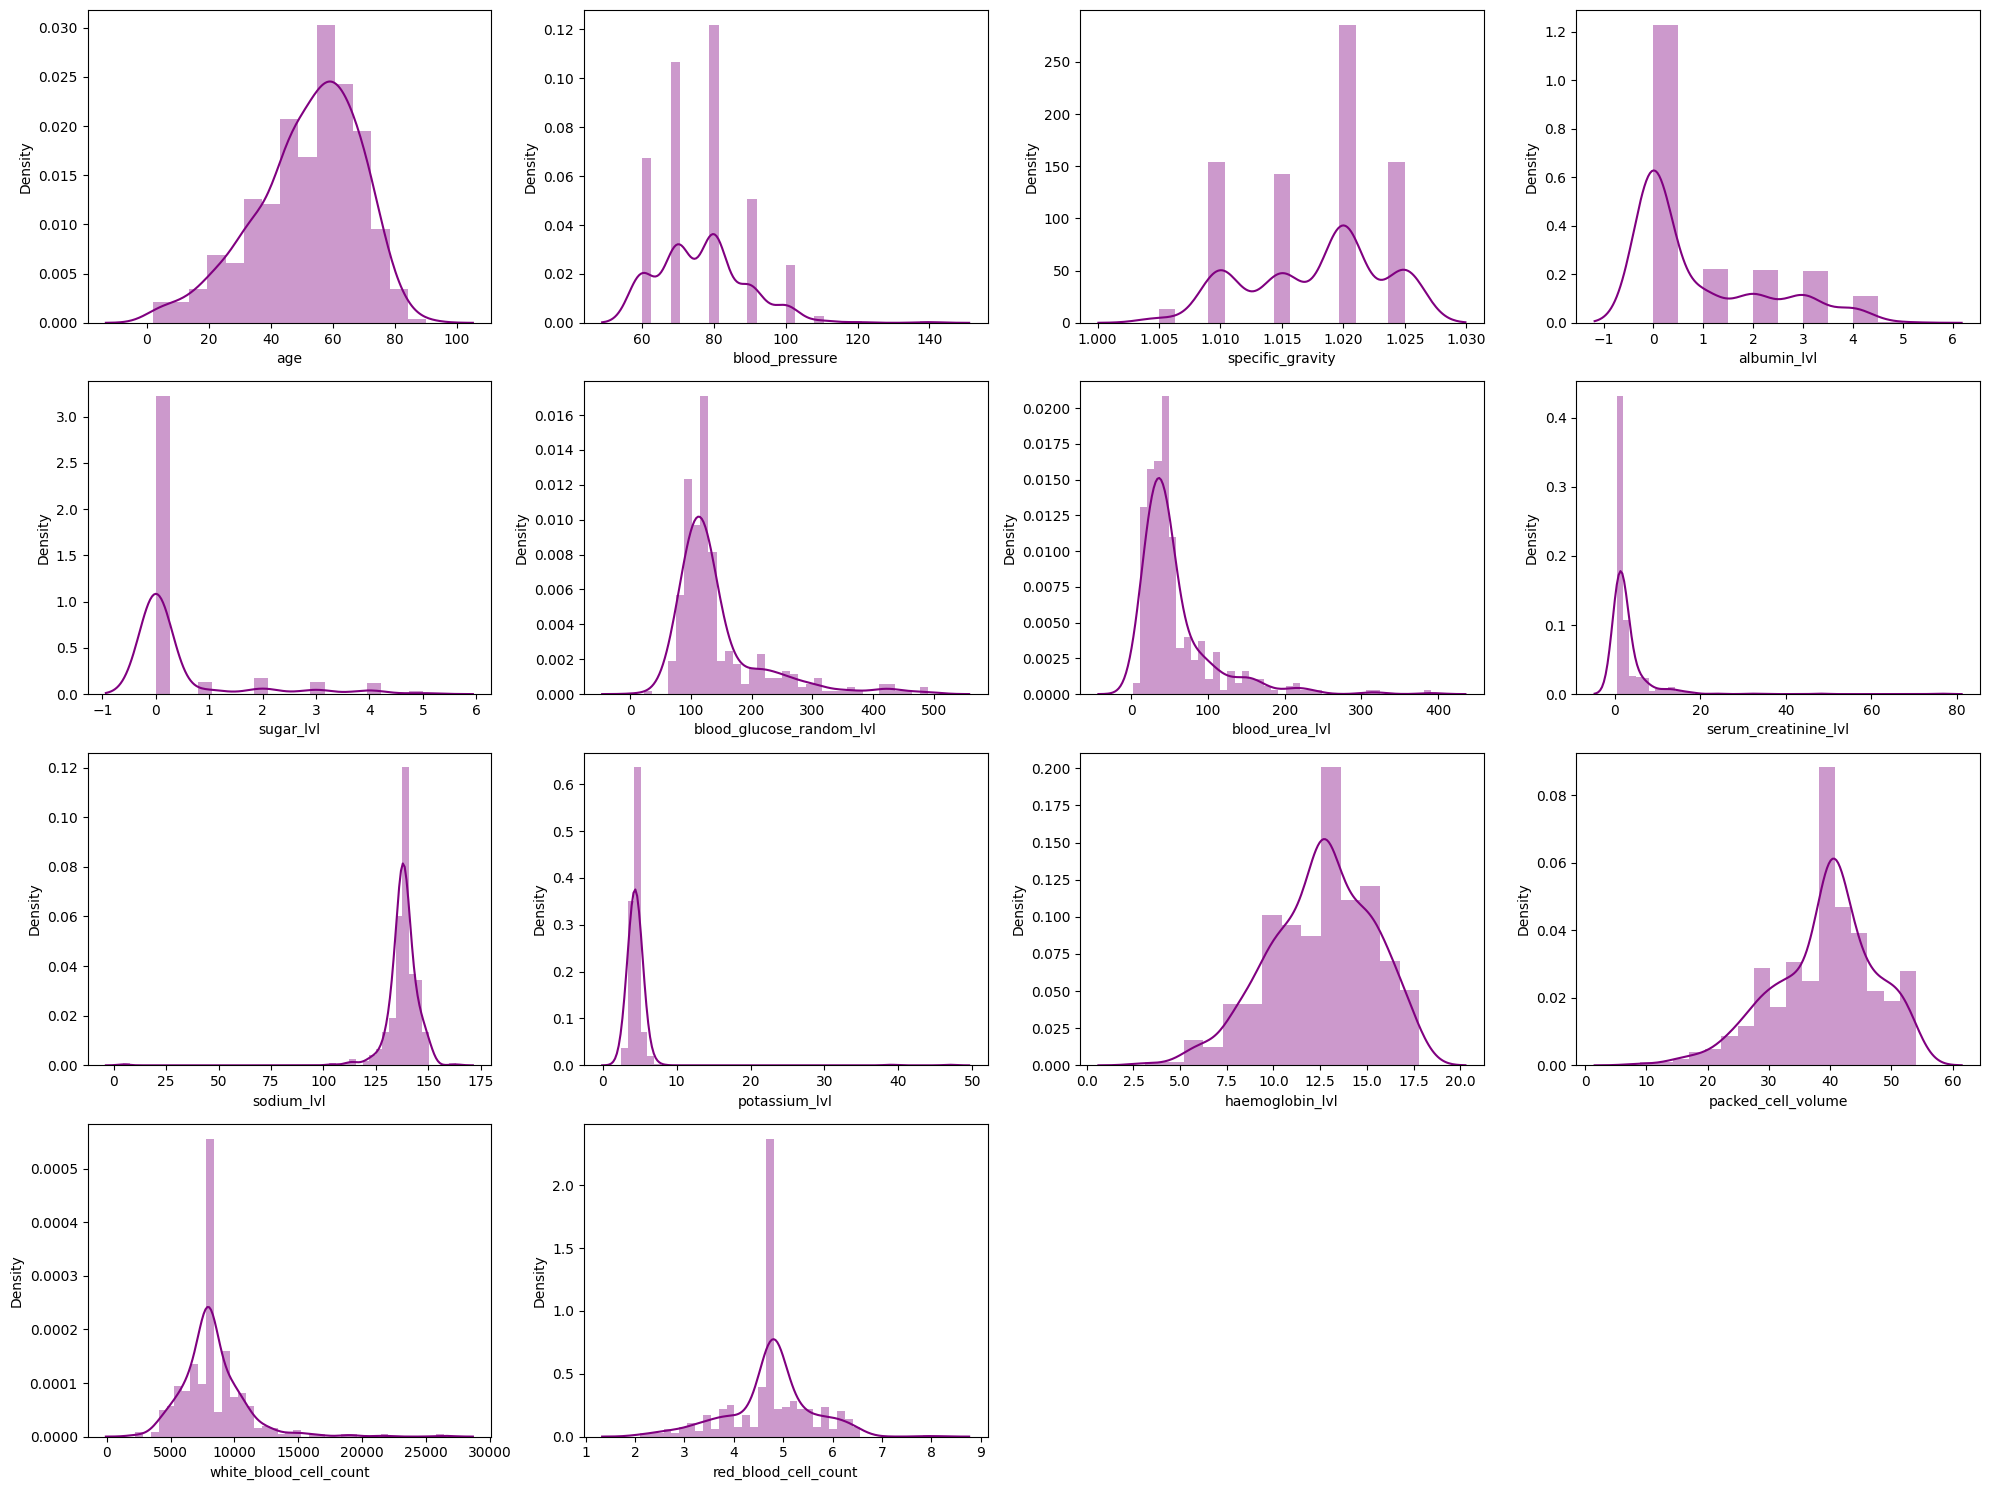

In [85]:
plt.figure(figsize=(20, 15))
plotnumber = 1

# Calculate the number of rows and columns needed
num_plots = len(numeric_cols)
num_rows = (num_plots - 1) // 4 + 1

for column in numeric_cols:
    if plotnumber <= num_plots:
        ax = plt.subplot(num_rows, 4, plotnumber)
        sns.distplot(df[column], color='purple')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

### Bar Chart of Categorical Columns

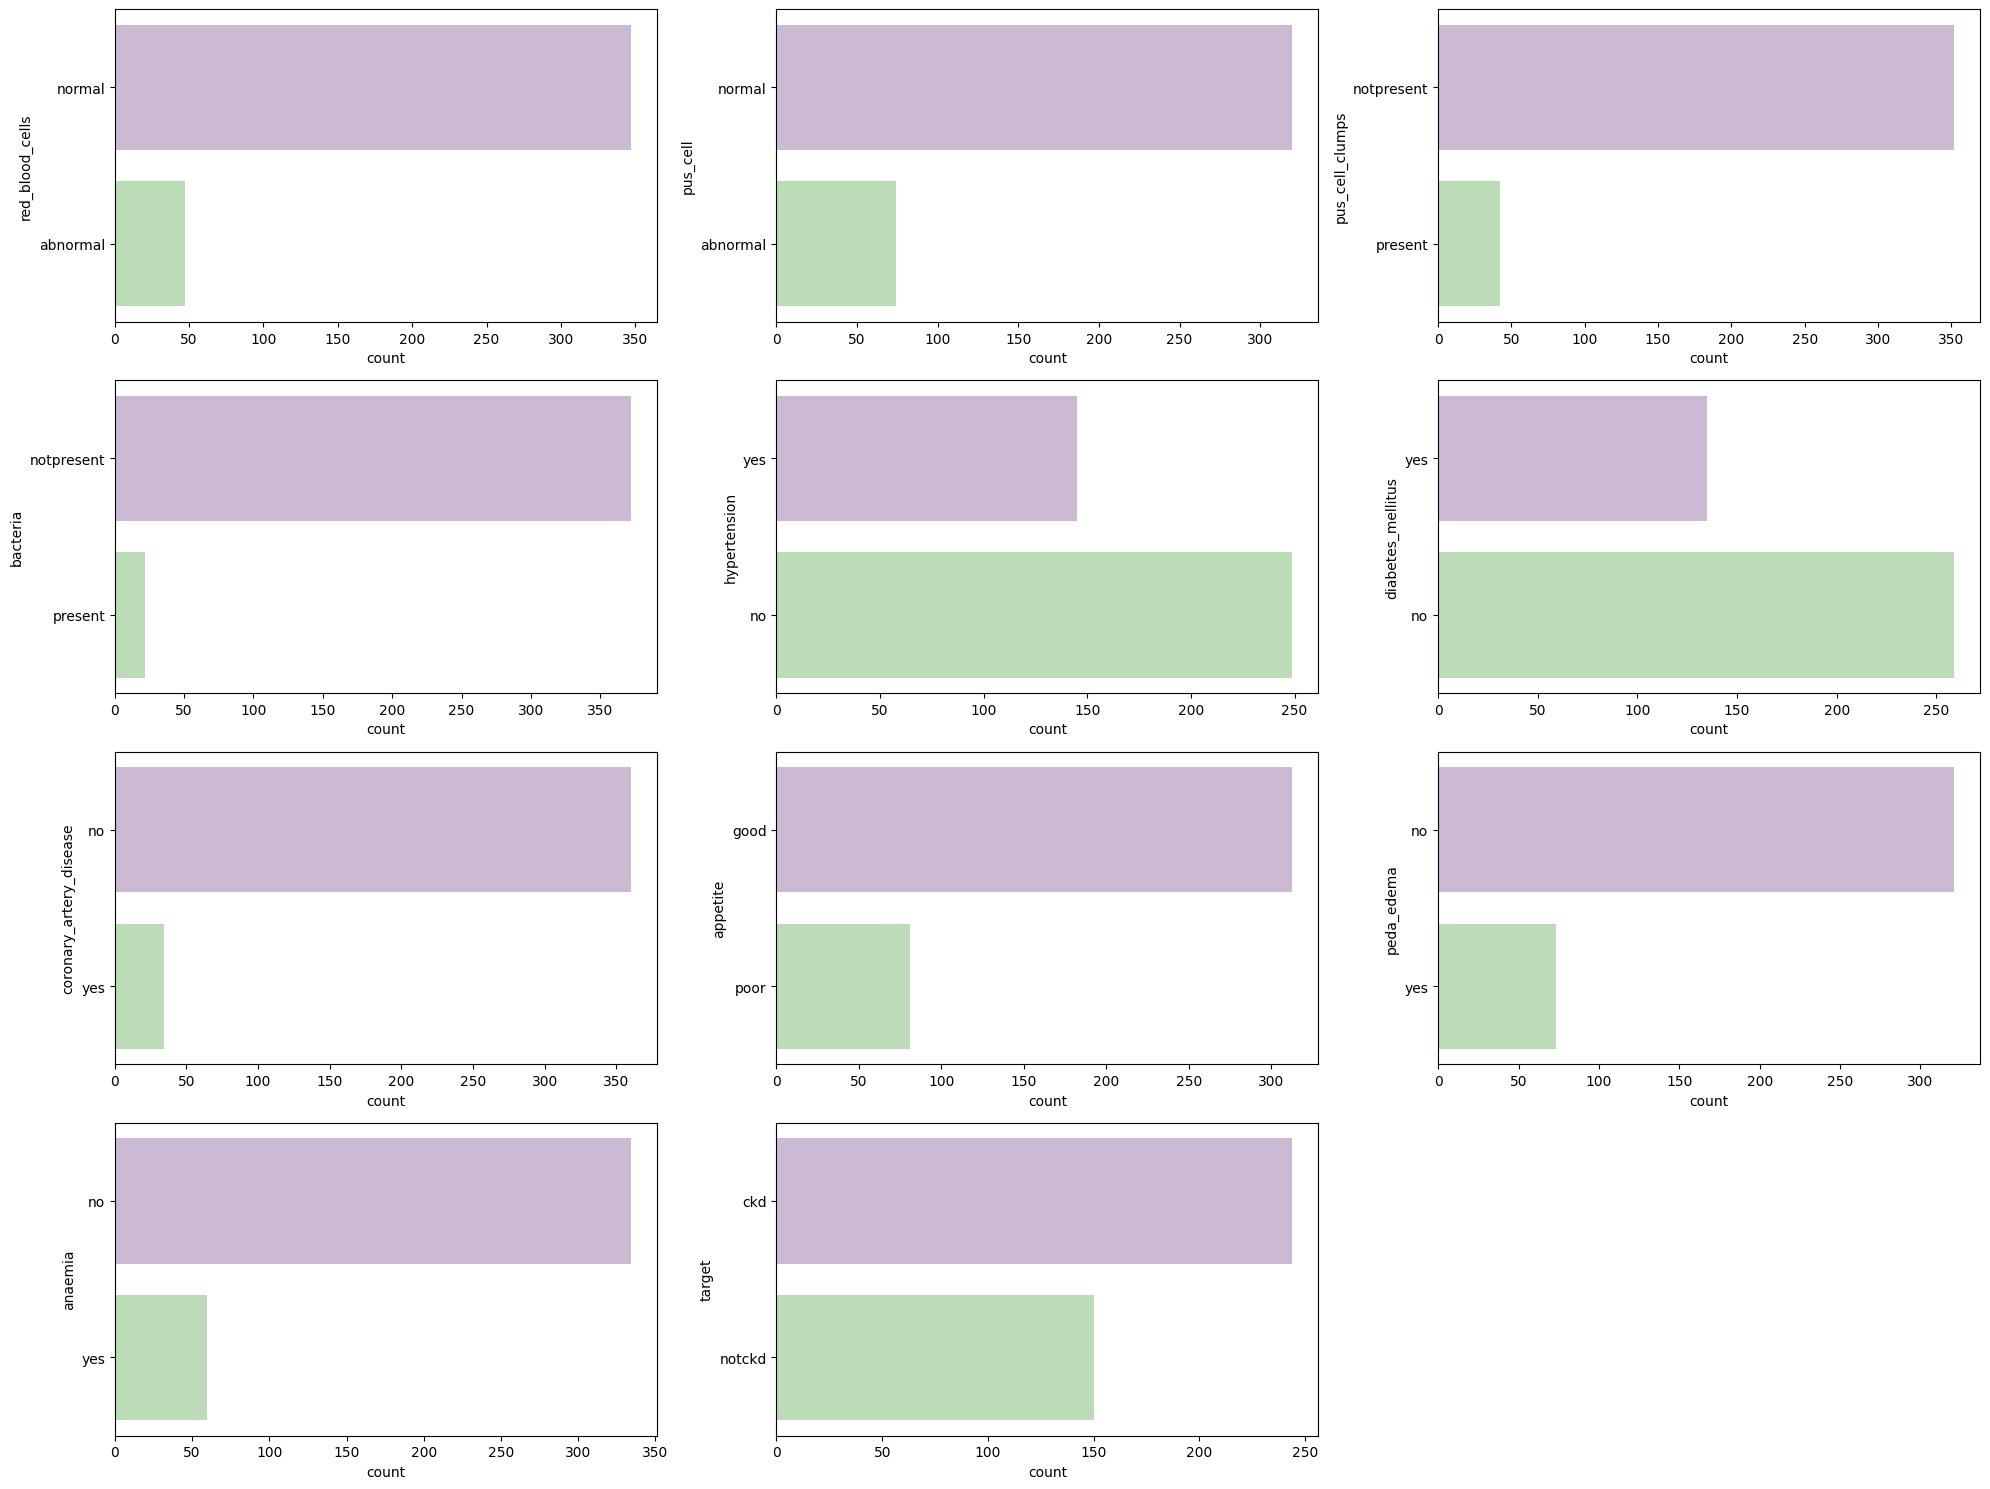

In [86]:
plt.figure(figsize=(20, 15))
plotnumber = 1

# Calculate the number of rows and columns needed
num_plots = len(category_cols)
num_rows = (num_plots - 1) // 3 + 1

for column in category_cols:
    if plotnumber <= num_plots:
        ax = plt.subplot(num_rows, 3, plotnumber)
        sns.countplot(df[column], palette='PRGn')
        plt.xlabel('count')
        
    plotnumber += 1

plt.tight_layout()
plt.show()


## Step 7: Data Modelling

* Train-Test-Split
* Fit the model to perform predictions
* Comparing the following algorithms to see which model performs the best

### Encoding Text Data

In [87]:
for col in category_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

anaemia has 2 categories

target has 2 categories



In [88]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in category_cols:
    df[col] = le.fit_transform(df[col])

In [89]:
df.head()

,age,blood_pressure,specific_gravity,albumin_lvl,sugar_lvl,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random_lvl,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anaemia,target
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
5,60.0,90.0,1.015,3.0,0.0,1,1,0,0,74.0,...,39.0,7800.0,4.4,1,1,0,0,1,0,0


### Scaling the features

In [90]:
X= df.drop(['target'],axis=1)
Y= df['target']

In [91]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Splitting the Dataset

In [92]:
X_train_scaled , X_test_scaled, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.30,random_state=0)

### KNN Algorithm

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, Y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(Y_test, knn.predict(X_test_scaled))

print(f"Training Accuracy of KNN is {accuracy_score(Y_train, knn.predict(X_train_scaled))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, knn.predict(X_test_scaled))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, knn.predict(X_test_scaled))}")

Training Accuracy of KNN is 0.9781818181818182
Test Accuracy of KNN is 0.9495798319327731 

Confusion Matrix :- 
[[67  6]
 [ 0 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        73
           1       0.88      1.00      0.94        46

    accuracy                           0.95       119
   macro avg       0.94      0.96      0.95       119
weighted avg       0.96      0.95      0.95       119



### Decision Tree Classifier

In [94]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, Y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(Y_test, dtc.predict(X_test_scaled))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(Y_train, dtc.predict(X_train_scaled))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, dtc.predict(X_test_scaled))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, dtc.predict(X_test_scaled))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9831932773109243 

Confusion Matrix :- 
[[72  1]
 [ 1 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        73
           1       0.98      0.98      0.98        46

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119



In [95]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train_scaled, Y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [96]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 3, 'splitter': 'best'}
0.9818181818181818


In [97]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(Y_test, dtc.predict(X_test_scaled))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(Y_train, dtc.predict(X_train_scaled))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, dtc.predict(X_test_scaled))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, dtc.predict(X_test_scaled))}")

Training Accuracy of Decision Tree Classifier is 0.9709090909090909
Test Accuracy of Decision Tree Classifier is 0.9831932773109243 

Confusion Matrix :- 
[[72  1]
 [ 1 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        73
           1       0.98      0.98      0.98        46

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119



### Random Forest Classifier

### Ada Boost Classifier

In [98]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train_scaled, Y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(Y_test, ada.predict(X_test_scaled))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(Y_train, ada.predict(X_train_scaled))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, ada.predict(X_test_scaled))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, ada.predict(X_test_scaled))}")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.9915966386554622 

Confusion Matrix :- 
[[73  0]
 [ 1 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        73
           1       1.00      0.98      0.99        46

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119



### Gradient Boosting Classifier

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, Y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(Y_test, gb.predict(X_test_scaled))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(Y_train, gb.predict(X_train_scaled))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, gb.predict(X_test_scaled))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, gb.predict(X_test_scaled))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.9915966386554622 

Confusion Matrix :- 
[[72  1]
 [ 0 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        73
           1       0.98      1.00      0.99        46

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119



### Stochastic Gradient Boosting

In [100]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train_scaled, Y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(Y_test, sgb.predict(X_test_scaled))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(Y_train, sgb.predict(X_train_scaled))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, sgb.predict(X_test_scaled))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, sgb.predict(X_test_scaled))}")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.9915966386554622 

Confusion Matrix :- 
[[72  1]
 [ 0 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        73
           1       0.98      1.00      0.99        46

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119



### XgBoost

In [101]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train_scaled, Y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(Y_test, xgb.predict(X_test_scaled))

print(f"Training Accuracy of XgBoost is {accuracy_score(Y_train, xgb.predict(X_train_scaled))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, xgb.predict(X_test_scaled))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, xgb.predict(X_test_scaled))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9831932773109243 

Confusion Matrix :- 
[[72  1]
 [ 1 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        73
           1       0.98      0.98      0.98        46

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119



### Cat Boost Classifier

### Extra Tree Classifier

In [102]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train_scaled, Y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(Y_test, etc.predict(X_test_scaled))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(Y_train, etc.predict(X_train_scaled))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, etc.predict(X_test_scaled))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, etc.predict(X_test_scaled))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 1.0 

Confusion Matrix :- 
[[73  0]
 [ 0 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        46

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119



### LGBM Classifier

In [109]:

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train_scaled, Y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(Y_test, lgbm.predict(X_test_scaled))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(Y_train, lgbm.predict(X_train_scaled))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(Y_test, lgbm.predict(X_test_scaled))}\n")
print(classification_report(Y_test, lgbm.predict(X_test_scaled)))

ModuleNotFoundError: No module named 'lightgbm'

## Step 8: Model Evaluation

### CONFUSION MATRIX

### ML ALGORITHM COMPARISION TABLE

### FEATURE IMPORTANCE

## Step 9: Testing the Model

- Take user input and predict the output